In [1]:
import numpy as np
import random

import torch
import torch.nn as nn
import torchvision.utils as vutils
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pylab as plt

import glob
from glob import glob
import nibabel as nb

import gzip
import os

import cv2
import imageio

In [2]:
MriFiles = glob(r"C:\Users\Xiaowei\Desktop\Clara\_oscar-data\*\*T1w.npy.gz")
SosFiles = glob(r"C:\Users\Xiaowei\Desktop\Clara\_oscar-data\*\*Vp.npy.gz")

images = []
for i in range(1,100):
    f1 = gzip.GzipFile(MriFiles[i], "r") # file type is now gzip.GzipFile
    data1 = np.load(f1)
    img1 = nb.Nifti1Image(data1,None)
    img1.header.get_xyzt_units()
    img1.to_filename(os.path.join('build', MriFiles[i].replace('.npy','.nii')))  # Save as NiBabel file

    f2 = gzip.GzipFile(SosFiles[i], "r") # file type is now gzip.GzipFile
    data2 = np.load(f2)
    img2 = nb.Nifti1Image(data2,None)
    img2.header.get_xyzt_units()
    img2.to_filename(os.path.join('build', SosFiles[i].replace('.npy','.nii')))  # Save as NiBabel file

KeyboardInterrupt: 

In [5]:
len(MriFiles)

1002

In [3]:
mri_files = glob(r"C:\Users\Xiaowei\Desktop\Clara\_oscar-data\*\*T1w.nii.gz")
sos_files = glob(r"C:\Users\Xiaowei\Desktop\Clara\_oscar-data\*\Vp.nii.gz")
print("Number of MRIs: "+str(len(mri_files)))
print("Number of SoS images: "+str(len(sos_files)))

Number of MRIs: 585
Number of SoS images: 585


# Registering Data

In [ ]:
import SimpleITK as sitk
from gui import RegistrationPointDataAquisition
# https://simpleitk.org/SPIE2019_COURSE/04_basic_registration.html

fixed_image = sitk.ReadImage(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\m100206_T1w_nobias.nii.gz')
moving_image = sitk.ReadImage(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\m100307_T1w_nobias.nii.gz')
initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

RegistrationPointDataAquisition(fixed_image, moving_image, figure_size=(8,4), known_transformation=initial_transform, fixed_window_level=ct_window_level, moving_window_level=mr_window_level);

# Create sections

In [4]:
def create_sections(mri_im, sos_im, labels):
  [slice,y0,y1,x0,x1] = labels.split(',')
  temp_m = np.array(mri_im[:,:,int(slice)][int(y0):int(y1),int(x0):int(x1)])
  temp_s = np.array(sos_im[:,:,int(slice)][int(y0):int(y1),int(x0):int(x1)])

  return [temp_m, temp_s]

In [14]:
sections = []
brain_sections = []
size = 64
for f in range(100):
    mri_data = nb.load(mri_files[f]).get_fdata()
    sos_data = nb.load(sos_files[f]).get_fdata()

    # extracting regions of whole image
    n=0
    slice = [i for i in range(130,210)]
    for s in slice:
        sections.append(create_sections(mri_data,sos_data,str(s)+","+str(64)+","+str(64+size)+','+str(0)+","+str(0+size)))
        # for n in range(0,int(mri_data.shape[0]/size)):
        #     for k in range(0,int(mri_data.shape[2]/size)):
        #         sections.append(create_sections(mri_data,sos_data,str(s)+","+str(n*size)+","+str(n*size+size)+','+str(k*size)+","+str(k*size+size)))
            
# extracting the brain patches
# for i in range(len(sections)):
#     if((i-6)%20==0 or (i-11)%20==0): brain_sections.append(sections[i])
#     else: continue

print("Full dataset: " +str(np.array(sections).shape))
print("Brain-containing images: " +str(len(brain_sections)))

error: Error -3 while decompressing data: invalid code lengths set

In [8]:
# for i in range(len(brain_sections)):
#     cv2.imwrite(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\mri2sos_dataset\A\mri_img'+str(i)+'.png', brain_sections[i][0])
#     cv2.imwrite(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\mri2sos_dataset\B\sos_img'+str(i)+'.png', brain_sections[i][1])

In [ ]:
len(sections)

4800

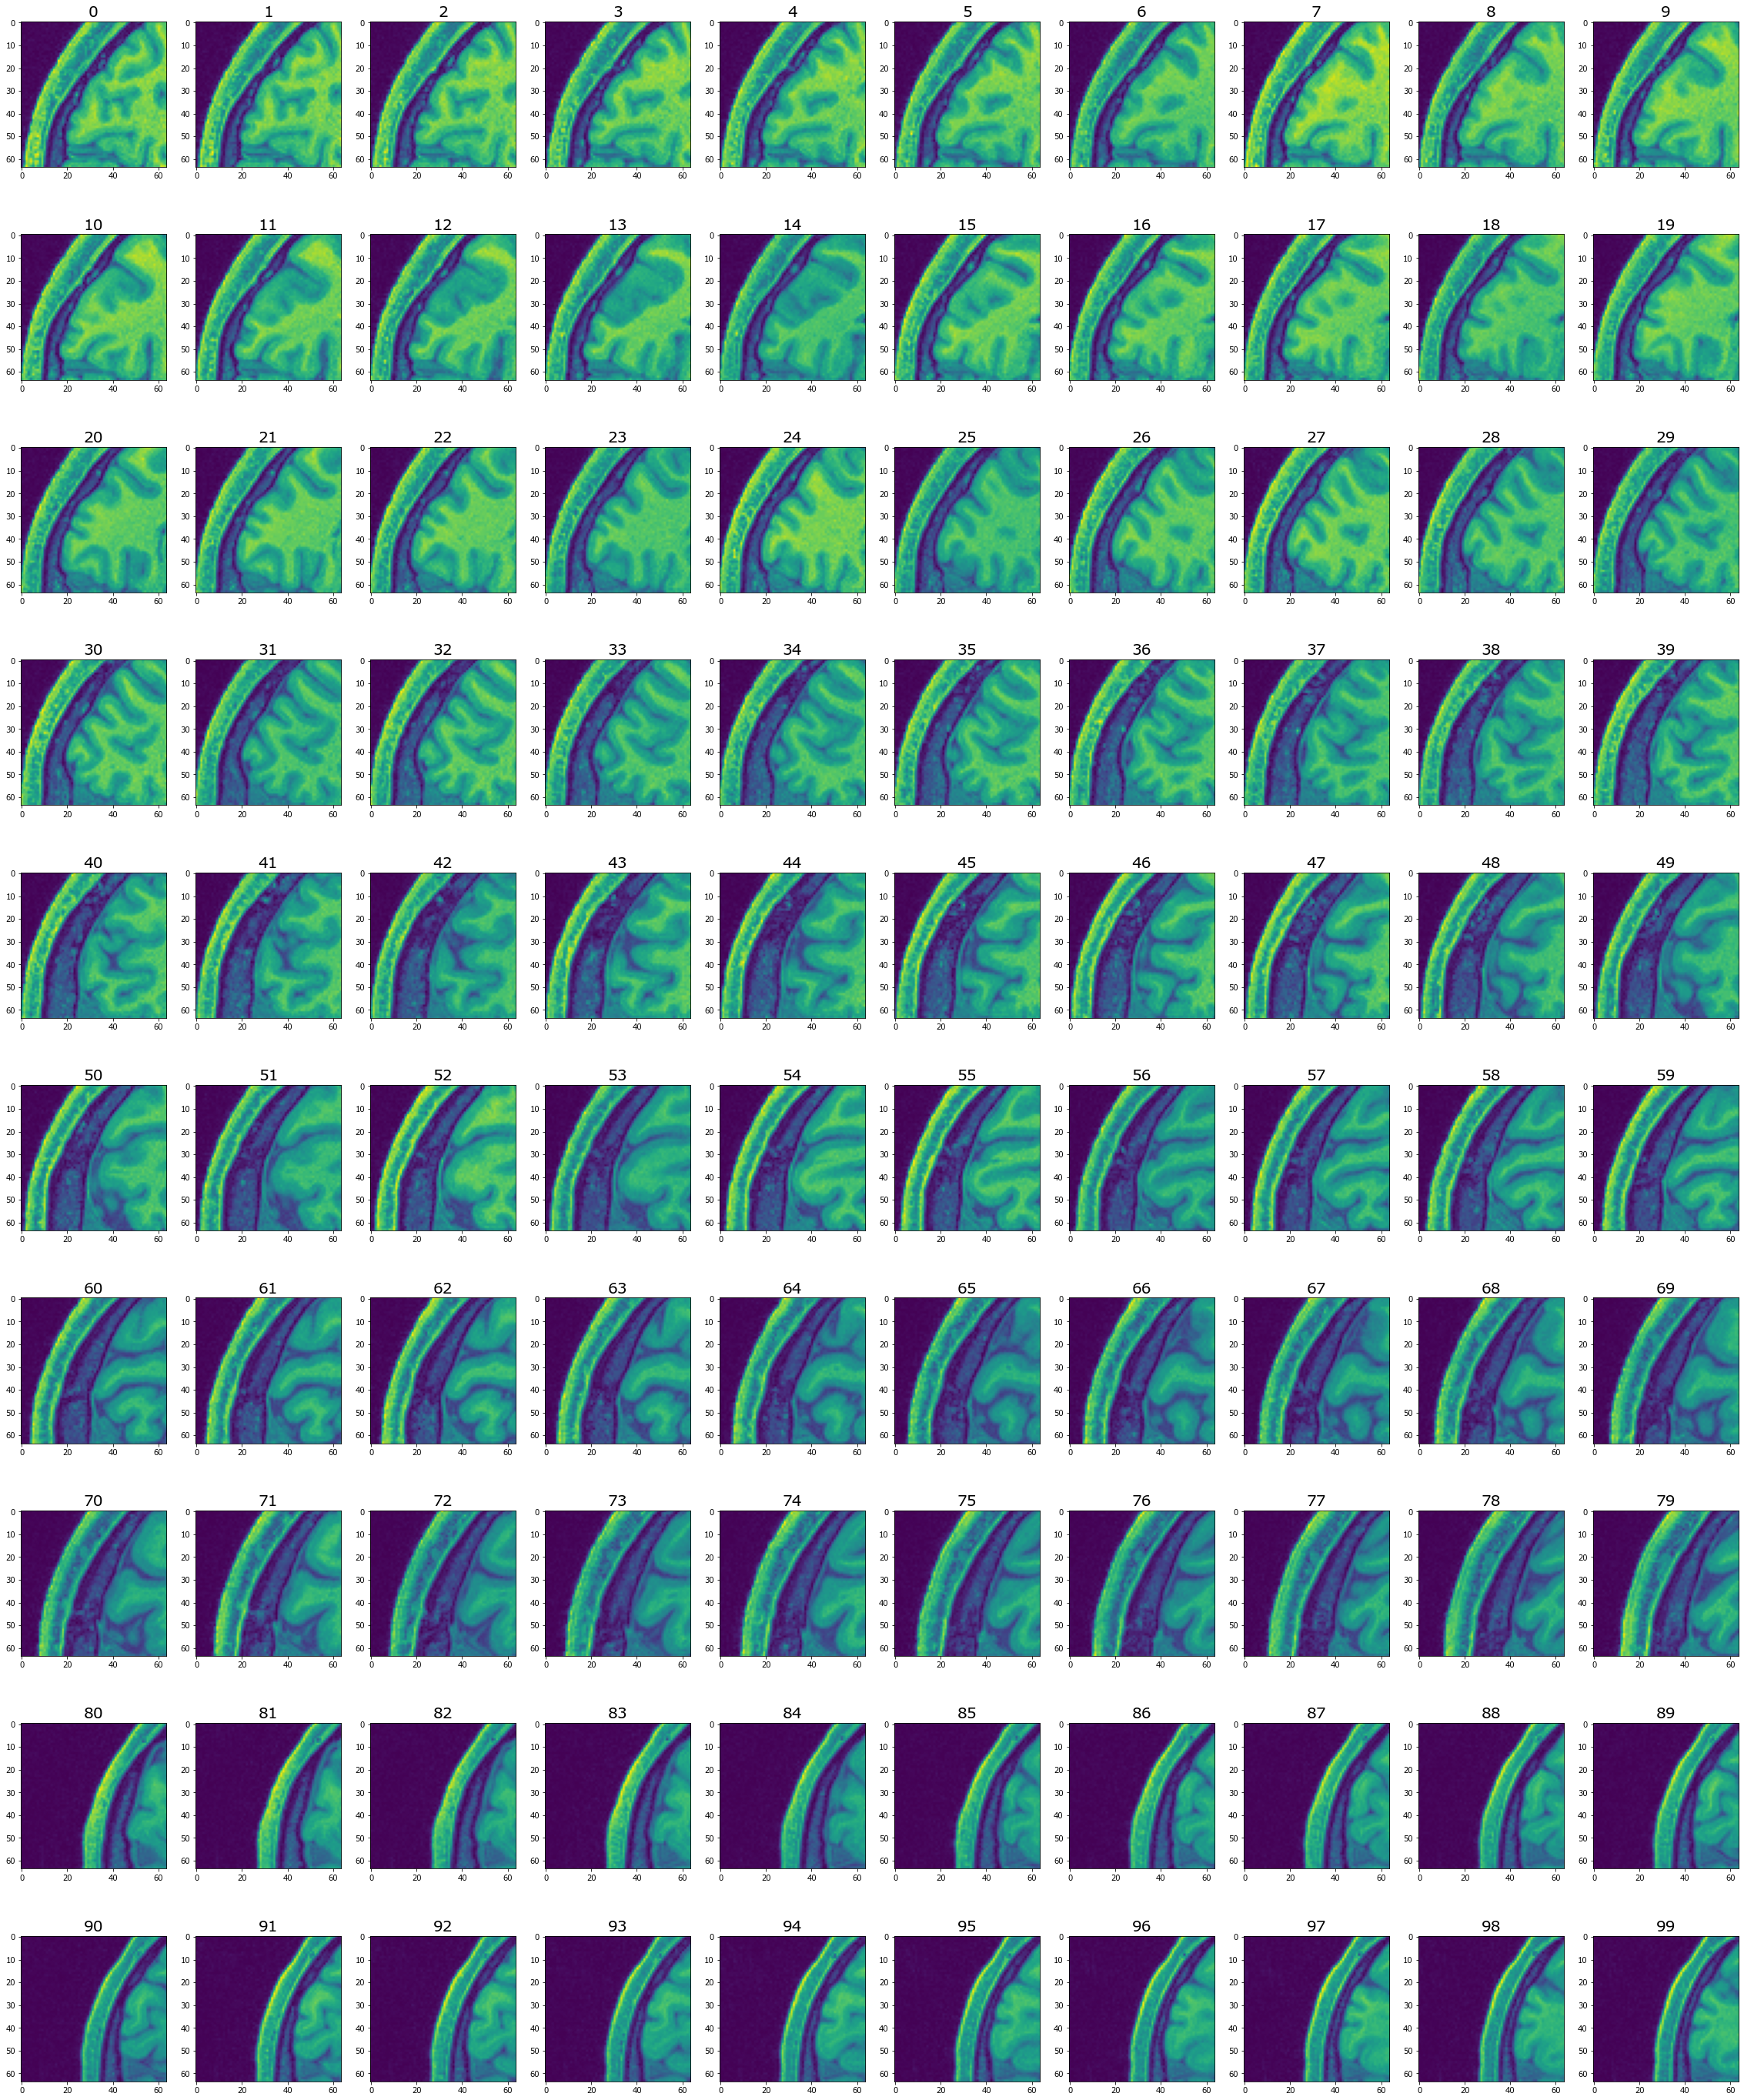

In [15]:
plt.subplots(10,10, figsize=(40,50))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(sections[i][0])
    plt.title(str(i), fontsize=20)

In [17]:
for i in range(len(sections)):
    imageio.imwrite(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_datset\A\mri_img'+str(i)+'.png', sections[i][0])
    imageio.imwrite(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\B\sos_img'+str(i)+'.png', sections[i][1])

FileNotFoundError: The directory 'C:\\Users\\Xiaowei\\Desktop\\Clara\\CycleGAN\\Datasets\\same_patch_datset\\A' does not exist